# Counts from random search with N = 100000 simulations 
to visualize the combinations that lead to "Review" being the unique Nash Equilibrium case 

Graphs of histograms: Proportion of times the strategy is to review or guess in unique nash and more than one equilibrium.

In [21]:
import os 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'  # clears up blurry images 

sns.color_palette("pastel")
plt.style.use('seaborn-muted')
sns.set_style('ticks')

color_dict_strategy = {"Guess": "tab:blue", "Not_Unique" : "black", "Review": "tab:green"}
color_dict_params = sns.color_palette("crest", as_cmap=True)

# Create the folder to save images based on project directory
project_root_dir = "."
fig_foldername = 'figs_R_W_vary'
figs_path = os.path.join(project_root_dir, fig_foldername)

def save_fig(name, images_path=figs_path, tight_layout=False, extension="png", resolution=300):
    """ Saves figure in the fig folder in project root directory"""
    if not os.path.isdir(images_path):
        os.makedirs(images_path)
    path = os.path.join(images_path, name + "." + extension)
    print("Saving figure:", name)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=extension, dpi=resolution)

In [22]:
payoff_full = pd.read_csv('payoff_R_W_vary_N100000.csv')
payoff_full.head();
# Drop rows where there is no equilibrium 
nashexists = payoff_full.dropna()
#nashexists.head()
nashexists.describe();
payoff_full.describe()

,pT,W,R,pL,c,pL*c,pQ,Max_R1_Payoff,Max_R2_Payoff,Max_Payoff,Number_Eqs,Strategy
count,100000.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.5,50.009940,49.958670,0.500041,25.460100,12.739874,1.0,36.984039,39.335927,39.335927,1.782930,1.312810
std,0.0,29.084733,29.153141,0.289175,14.450795,11.161820,0.0,20.897810,20.476341,20.476341,0.977016,0.715112
min,0.5,0.000000,0.000000,0.000001,1.000000,0.000055,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.5,25.000000,25.000000,0.249062,13.000000,3.520454,1.0,20.750000,23.170000,23.170000,1.000000,1.000000
50%,0.5,50.000000,50.000000,0.499612,25.000000,9.539228,1.0,32.750000,37.800000,37.800000,1.000000,1.000000
75%,0.5,75.000000,75.000000,0.751347,38.000000,19.430473,1.0,52.170000,53.900000,53.900000,3.000000,2.000000
max,0.5,100.000000,100.000000,0.999995,50.000000,49.989704,1.0,99.640000,99.640000,99.640000,4.000000,2.000000


In [23]:
#payoff = nashexists.sample(frac=0.5, random_state=1)
payoff = nashexists
print(payoff.columns)
payoff['Strategy_Name'].value_counts()


Index(['pT', 'W', 'R', 'pL', 'c', 'pL*c', 'pQ', 'R1_array', 'R2_array',
       'Max_R1_Payoff', 'Max_R2_Payoff', 'Max_Payoff', 'Eq', 'Number_Eqs',
       'Strategy_Name', 'Strategy'],
      dtype='object')


Not_Unique    46102
Review        39077
Guess         14821
Name: Strategy_Name, dtype: int64

In [24]:
# Subset of payoffs with a unique Nash Equilibrium 
onenash = payoff.loc[payoff['Number_Eqs'] == 1]
onenash.head()
onenash.describe();
# Subset of payoffs with a unique Nash Equilibrium: Strategy to Review

one_nash_review = onenash.loc[onenash['Strategy_Name'] == "Review"]
one_nash_review.head()
one_nash_review.describe();

# Subset of payoffs with a unique Nash Equilibrium: Strategy to Guess

one_nash_guess = onenash.loc[onenash['Strategy_Name'] == "Guess"]
one_nash_guess.head()
one_nash_guess.describe();

In [26]:
# histogram function to control the details and aesthetics 

def my_displot(data = payoff, 
                x='R',
                filename = 'figure', 
                title = "" , 
                hue = 'Strategy_Name', 
                palette = color_dict_strategy, 
                multiple = 'stack', 
                xlabel = 'Specify x axis label',
                hue_order = color_dict_strategy,
                single = False, 
                **kwargs):
    g = sns.displot(data = data, x = x, hue=hue, palette=palette, multiple=multiple, hue_order = hue_order, **kwargs)
    g.set_axis_labels(xlabel)
    if single:
        plt.xlim(0, 1.1)
        ticks = [0, 0.5, 1]
        plt.xticks(ticks)

    save_fig(filename)

Saving figure: c_counts
Saving figure: pL_counts
Saving figure: R_counts
Saving figure: W_counts
Saving figure: pT_counts
Saving figure: pQ_counts


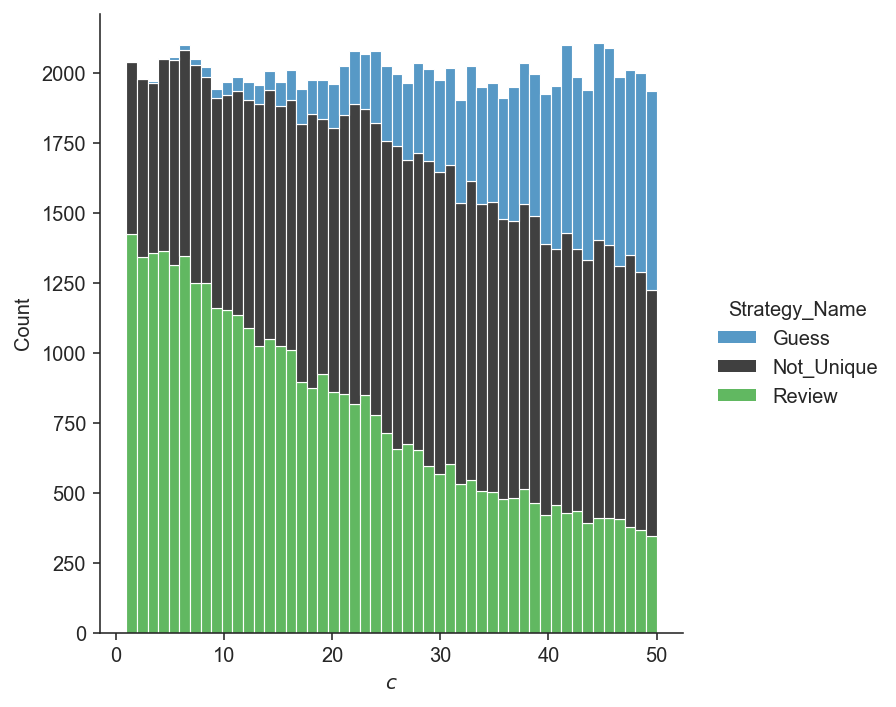

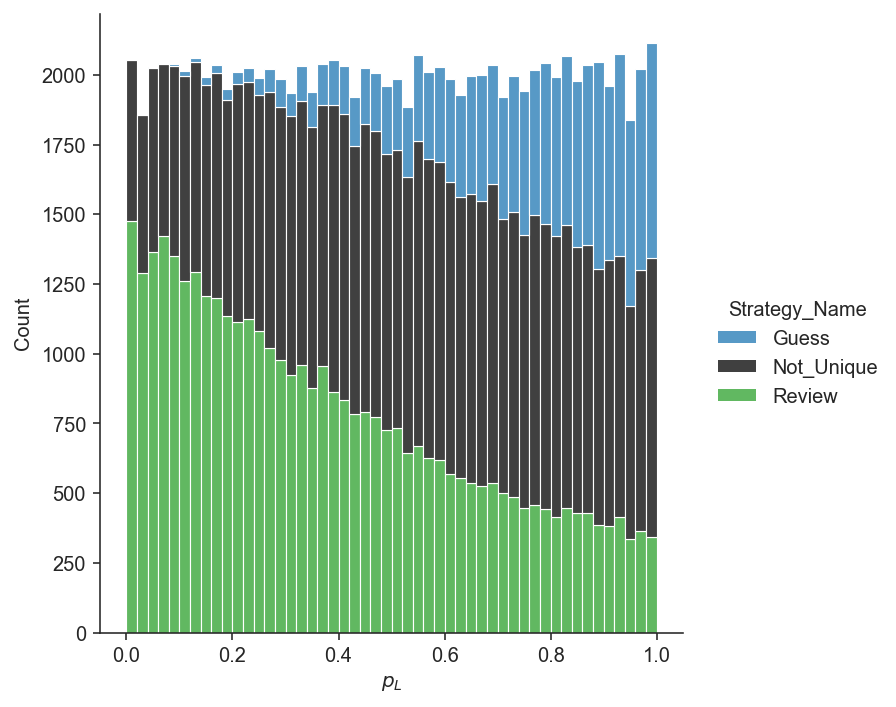

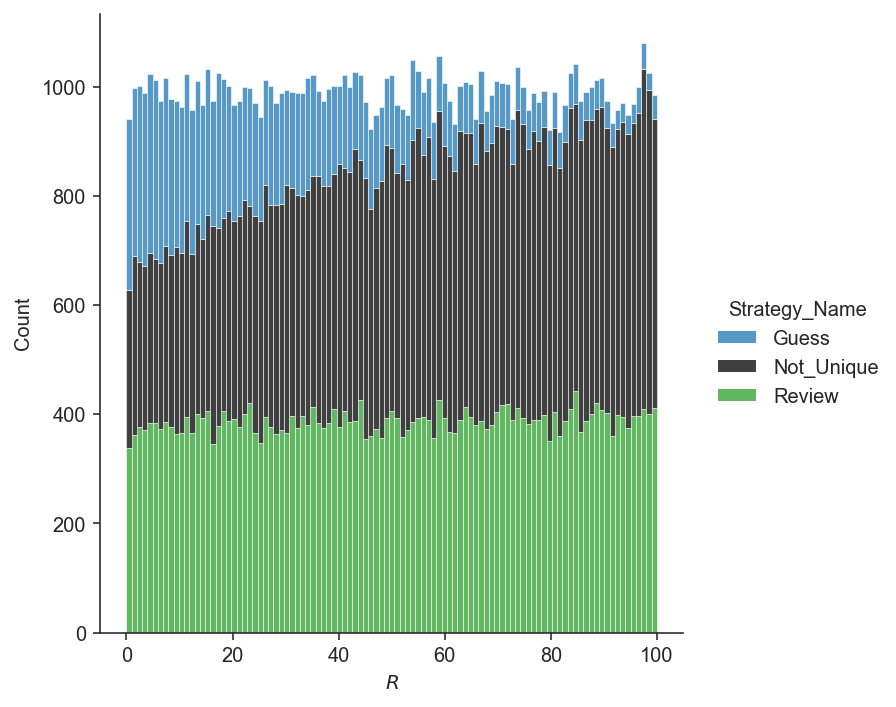

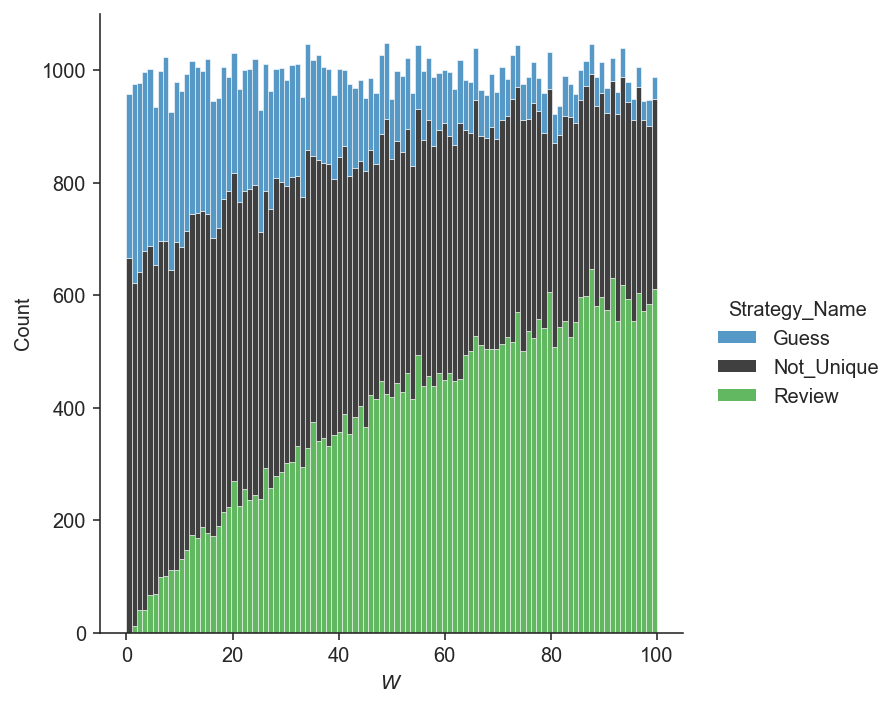

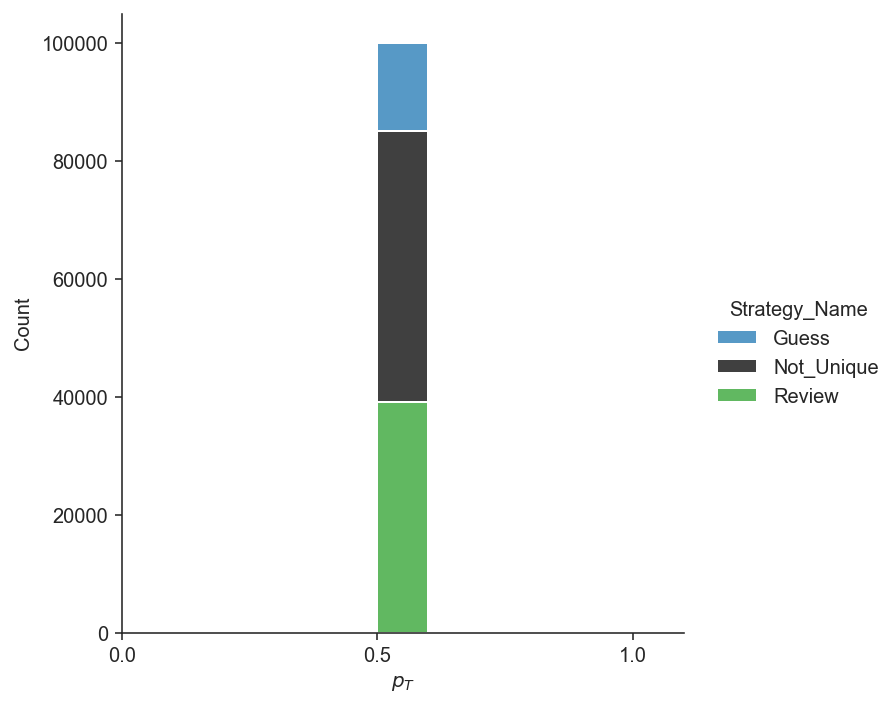

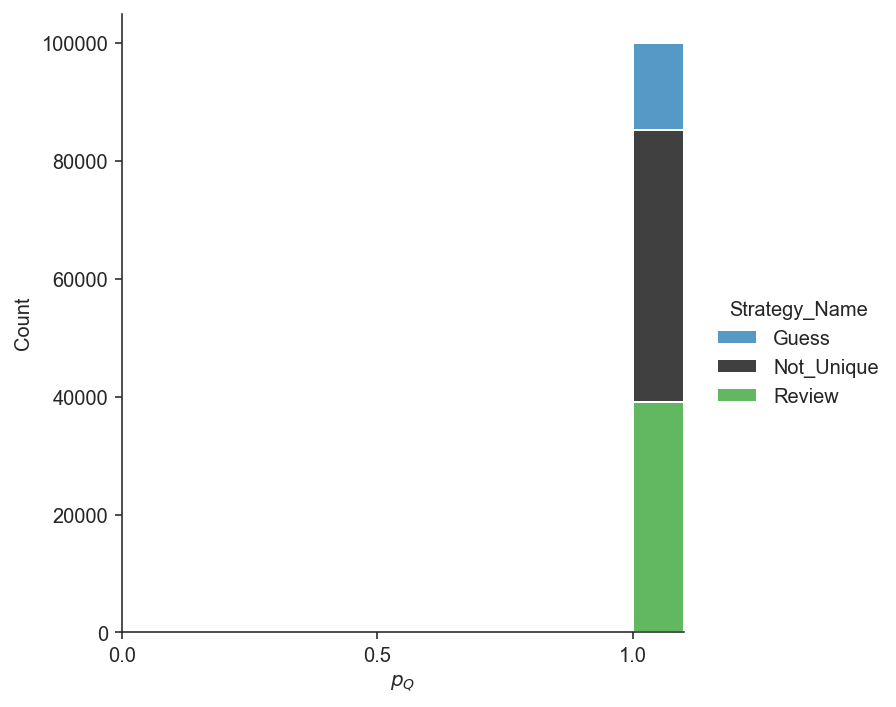

In [27]:
my_displot(x = 'c', filename = "c_counts", bins = 50, xlabel = '$c$') # c (1, 50")
my_displot(x = 'pL', filename = "pL_counts", bins = 50, xlabel = '$p_L$') # (0, 1)
my_displot(x = 'R', filename = "R_counts", bins = 101, xlabel = '$R$') # (0, 100)
my_displot(x = 'W', filename = "W_counts", bins = 101, xlabel = '$W$') # (0, 100)
# Single value histogram
my_displot(x = 'pT', filename = "pT_counts", bins = 10, xlabel = '$p_T$', single = True) # 0.5
my_displot(x = 'pQ', filename = "pQ_counts", bins = 10, xlabel = '$p_Q$', single = True) # 1


In [ ]:
# pL*c vs R
g = sns.relplot(data=one_nash_review, x='pL*c', y='R',
        hue = 'c', 
        size = 'c', 
        palette = color_dict_params
        )
g.set_axis_labels('$p_L \cdot c$')
save_fig('pLc_vs_R_Review')

g = sns.relplot(data=one_nash_guess, x='pL*c', y='R',
        hue = 'c', 
        size = 'c', 
        palette = color_dict_params
        )
g.set_axis_labels('$p_L \cdot c$')
save_fig('pLc_vs_R_Guess')




In [ ]:
# pL*c vs W

g = sns.relplot(data=one_nash_review, x='pL*c', y='W',
        hue = 'c', 
        size = 'c', 
        palette = color_dict_params
        )
g.set_axis_labels('$p_L \cdot c$')
save_fig('pLc_vs_W_Review')

g = sns.relplot(data=one_nash_guess, x='pL*c', y='W',
        hue = 'c', 
        size = 'c', 
        palette = color_dict_params
        )
g.set_axis_labels('$p_L \cdot c$')
save_fig('pLc_vs_W_Guess')